In [1]:
# Cell 1 — Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [2]:
# Cell 2 — Load cleaned dataset
df = pd.read_csv("student_dropout_clean.csv")
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Cell 3 — Split features and target
X = df.drop("Target", axis=1)
y = df["Target"]

print("Features shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Features shape: (4424, 36)
Target distribution:
 Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [4]:
# Cell 4 — Encode categorical variables
# If categorical columns are still strings, use LabelEncoder
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


In [5]:
# Cell 5 — Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
# Cell 6 — Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}


In [7]:
# Cell 7 — Train & evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="weighted")
    results[name] = {"accuracy": acc, "f1": f1}
    
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print(classification_report(y_test, preds))


c:\projects\student_dropout\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy: 0.7175141242937854
F1 Score: 0.6888639671834833
              precision    recall  f1-score   support

     Dropout       0.79      0.63      0.70       284
    Enrolled       0.47      0.22      0.30       159
    Graduate       0.72      0.95      0.82       442

    accuracy                           0.72       885
   macro avg       0.66      0.60      0.61       885
weighted avg       0.70      0.72      0.69       885


Random Forest
Accuracy: 0.7672316384180791
F1 Score: 0.7539029502277624
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.57      0.37      0.45       159
    Graduate       0.78      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.75      0.77      0.75       885


Gradient Boosting
Accuracy: 0.7627118644067796
F1 Score: 0.7565434717555226
         

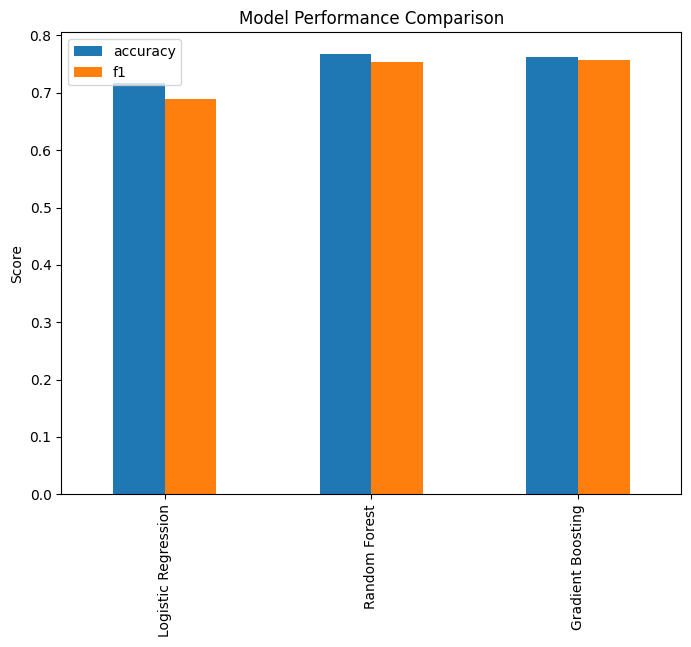

,accuracy,f1
Logistic Regression,0.717514,0.688864
Random Forest,0.767232,0.753903
Gradient Boosting,0.762712,0.756543


In [8]:
# Cell 8 — Compare models
results_df = pd.DataFrame(results).T
results_df.plot(kind="bar", figsize=(8,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()
results_df


In [9]:
# Cell 9 — Save best model
best_model_name = results_df["f1"].idxmax()
best_model = models[best_model_name]

joblib.dump(best_model, "student_dropout_model.pkl")
print(f"✅ Best model saved as student_dropout_model.pkl ({best_model_name})")


✅ Best model saved as student_dropout_model.pkl (Gradient Boosting)
